# Entrenamiento de modelos de machine learning para la clasificación de uso cobertura del suelo a partir de imágenes satelitales

Se cargan los métodos necesarios de las librerias sklearn y pandas

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


Se cargan los datos de entrenamiento que fueron obtenidos previamente a partir de la fotointerpretación de imágenes satelitales de alta resoluciòn usando sistemas de información geográfica.

In [142]:
sitios  = pd.read_csv("./sitios_entrenamiento_2021_lingue_reflex.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ",")
sitios


,categoria,descrpcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1.0,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1.0,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1.0,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1.0,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1.0,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
684,NaN,NaN,6.0,POINT (-73.15821942536273 -39.451965724074356),0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,NaN,NaN,6.0,POINT (-73.14340176972097 -39.45305711564692),0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,NaN,NaN,6.0,POINT (-73.20807053264092 -39.44553718808514),-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,NaN,NaN,6.0,POINT (-73.18515348804354 -39.447118725573525),0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


Se verifican si existen datos incompletos (na)

In [143]:
sitios.isna().sum()

categoria     587
descrpcion    677
id_clase        2
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

Existen dos puntos a los que no se les asigno un valor de id_clase, estos puntos se eliminan.

In [144]:
sitios = sitios.dropna(subset = ['id_clase'])
sitios.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

# Machine Learning Clasification

### Se selecciona la columna id_clase como las etiquetas (labels), y el valor de las bandas como caracteristicas (features).

In [145]:
labels = sitios['id_clase'] # Si lo hacemos usando log luego obtenemos un error al usar grid search
features = sitios.loc[:,['B1','B2','B3','B4','B5','B6','B7']]

### Para que el modelo luego pueda utilizarse para predicir la clase de cobertura del suelo en la imagen, debemnos entrenar el modelo con arrays de la mismas dimensiones que la imágen (número de bandas). Por lo tanto, labels y features a arrays.

In [146]:
labels_array = labels.values
print(f' Las vector etiquetas tiene dimensiones {labels_array.shape} y es de tipo de datos {type(labels_array)}')


 Las vector etiquetas tiene dimensiones (687,) y es de tipo de datos <class 'numpy.ndarray'>


In [21]:
features_array = features.values
print(f' El vector de caracteristicas tiene dimensiones {features_array.shape} y es de tipo de datos {type(features_array)}')



 El vector de caracteristicas tiene dimensiones (687, 7) y es de tipo de datos <class 'numpy.ndarray'>


### Usando la función train_test_split separamos las etiquetas y las caracteristicas un conjunto de entrenamiento (X_train_array, y_train_array) y un conjunto validación (X_test, y_test ). Asignamos en este caso 25% de los datos para la validación.

In [22]:
X_train_array,X_test_array, y_train_array, y_test_array = train_test_split(features_array,labels_array, test_size = 0.25, random_state = 42)

Entrenaremos inicialmente con uno de los algoritmos de clasificación más intepretables: El árbol de decisión.

1. Inicializamos el objeto, y lo ajustamos utilizando los datos de entrenamiento X_train, y_train

In [26]:

dt = DecisionTreeClassifier(criterion= 'gini', random_state= 42)
dt.fit(X_train_array,y_train_array)

DecisionTreeClassifier(random_state=42)

Una de las ventajas de los árboles de desición es poder evaluar la importancia relativa de las variables

In [32]:
pd.DataFrame([dt.feature_importances_], columns =[features.columns])

,B1,B2,B3,B4,B5,B6,B7
0,0.101515,0.247705,0.325203,0.194863,0.004841,0.121759,0.004115


In [33]:
pd.DataFrame(dt.feature_importances_, columns = ['Value'], index = features.columns)

,Value
B1,0.101515
B2,0.247705
B3,0.325203
B4,0.194863
B5,0.004841
B6,0.121759
B7,0.004115


### Los hiperparámetros utilizados en el modelos fueron los siguientes

In [34]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### La validación del modelo entrenado la podemos realizar utilizando la función predict. Se genera un array con las clases predichas por el modelo, y se compara con los datos originales que separamos para la validación (y_test). 

In [35]:

y_pred_array = dt.predict(X_test_array)

Se importa el módulo de la matrix de confusión desde la libreria sklearn, y calculamos para este caso.

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = confusion_matrix(y_test_array, y_pred_array)

En este caso la diagonal representa los aciertos del modelo, y los numeros fuera de la diagonal los errores. 

In [37]:
confusion

array([[43,  3,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  1],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  1,  0,  0,  0, 14]], dtype=int64)

Lo mismo de una forma más visual.

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

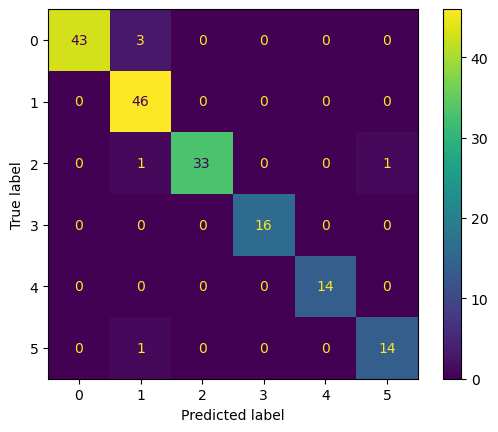

In [192]:
disp.plot()

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test_array,y_pred_array))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        46
         2.0       0.90      1.00      0.95        46
         3.0       1.00      0.94      0.97        35
         4.0       1.00      1.00      1.00        16
         5.0       1.00      1.00      1.00        14
         6.0       0.93      0.93      0.93        15

    accuracy                           0.97       172
   macro avg       0.97      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



Se puede complementar este análisis realizando una validaciónn cruzada

In [125]:
from sklearn.model_selection import cross_val_score

In [149]:

dt_cv = DecisionTreeClassifier(criterion= 'gini', random_state= 42)

In [148]:
training_scores = cross_val_score(dt, X_train_array, y_train_array, cv = 5)

In [147]:
print(f'Cross-validation Scores for training: {training_scores}')
print(f'Mean Accuracy: {training_scores.mean()}')


Cross-validation Scores for training: [0.98058252 0.99029126 0.99029126 0.99029126 0.95145631]
Mean Accuracy: 0.9805825242718447


In [150]:
testing_scores = cross_val_score(dt, X_test_array, y_test_array, cv = 5)

In [151]:
print(f'Cross-validation Scores: {testing_scores}')
print(f'Mean Accuracy: {testing_scores.mean()}')

Cross-validation Scores: [1.         0.97142857 0.97058824 0.94117647 0.94117647]
Mean Accuracy: 0.9648739495798321


# Modelo número II. Random Forest. 

## El modelo de random forest es una ensambleje de muchos árboles de decisión, es uno de los algoritmos más destacados en la literatura por su buen rendimiento. A diferencia del caso anterior, en esta ocasión vamos a encontrar los mejores hiperparámetros del modelo utilizando la función grid_search y random_search.



1.- Método Grid_seach: Con el método grid search se realiza una evaluación exaustiva de toda la combinación de hiperparámetros que queremos evaluar. Para esto definimos una grilla de hiperparámetros construyendo un diccionario. 

Ventajas: Evaluación exaustiva de todas las combinaciones.

Desventajas: Gran esfuerzo de procesado. No es viable para la combinación de una gran cantidad de hiperparametros.

In [152]:
parameters = {
    "n_estimators": [10,20,50,70,100],
    "max_features": ["sqrt","log2",None],
    "max_depth": [None, 10,20,30],
    "min_samples_split" : [2,4,8,10],
    "min_samples_leaf" : [1,2,4],
    "bootstrap" : [True, False]
}

Esta vez vamos a probar el algoritmo rondomforest. Para la busqueda de los hiperparametros podemos utilizar la función GridSearch or RandomizedSearchCV

Se importan las funciones necesarias

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Se inicializa el objeto del clasificador sin aportar valores para el hiperparametros. 

In [153]:
# Iniciamos el clasificador vacio

rfc = RandomForestClassifier()


Utilizamos el Algoritmo GridSearch para buscar la mejor combinación de hiperparámetros para ajustar el modelo. 

In [154]:
search_GR = GridSearchCV(estimator = rfc, 
                         param_grid= parameters,
                         n_jobs = 1,
                         cv = 5, 
                         scoring = 'accuracy')

2. RandomSearch otro algoritmo que podemos utilizar es el algoritmo  de busqueda aleatoria. Este algoritmo selecciona aleatoriamente una combinación de los posibles parametros, va optimizando la selección de parametros de forma iterativa hasta acercarse a la mejor solución (descenso del gradiente) 

Ventajas: Permite de forma computacionalmente más eficiente llegar a la elección de los mejores valores de los hiperparametros que disminuyen una función de evaluación. Permite explorar un mayor rango de posibilidades de hiperparametros.

Desventajas: Puede no encontrar la solución óptima, pero generalmente encuentra una solución adecuada. Al no ser determinista puede hacer levemente más dificil la reproducibilidad de los resultados.

In [155]:
search_Random = RandomizedSearchCV(estimator = rfc, 
                                   param_distributions = parameters, 
                                   n_iter = 10, 
                                   cv = 5, 
                                   random_state = 42)


A continuación utilizamos los objetos para ajustar los modelos. 

In [156]:
search_GR.fit(X_train_array,y_train_array)
search_Random.fit(X_train_array,y_train_array)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

Mejores estimadores grid search

In [240]:
search_GR.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

Mejores estimadores RandomSearch

In [242]:
search_Random.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

Mejor modelo GridSearch

In [245]:
search_GR.best_estimator_


RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=20)

Mejores Score

In [248]:
search_GR.best_score_

0.9922330097087378

Mejor

In [250]:
search_Random.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=20)

In [251]:
search_Random.best_score_

0.9883495145631068

Finalmente, evaluamos la calidad de nuestro algoritmo para predicir el conjunto de test

In [136]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report 

In [252]:
print(classification_report(y_train_array,search_GR.predict(X_train_array)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [253]:
print(classification_report(y_train_array,search_Random.predict(X_train_array)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [259]:
print(classification_report(y_test_array, search_GR.predict(X_test_array)))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        46
         2.0       0.92      1.00      0.96        46
         3.0       1.00      1.00      1.00        35
         4.0       1.00      1.00      1.00        16
         5.0       1.00      1.00      1.00        14
         6.0       1.00      0.93      0.97        15

    accuracy                           0.98       172
   macro avg       0.99      0.98      0.98       172
weighted avg       0.98      0.98      0.98       172



In [ ]:
print(classification_report(y_test_array, search_Random.predict(X_test_array)))

Vamos a exportar los modelos usanto pickle de esta manera podemos compartilos e utilizarlos en otros scripts. Vamos usar pickle para exportar los modelos.

In [157]:
import pickle
with open('decision_tree_example.pkl', 'wb') as file:
    pickle.dump(dt,file)

In [158]:
with open('random_forest_gs.pkl','wb') as file:
    pickle.dump(search_GR,file)

In [159]:
with open('random_forest_rs.pkl','wb') as file:
    pickle.dump(search_Random,file)

# FIN